# Introduction

*I will perform data cleansing, wrangling and analyzing on **4** datasets, **3** of them contains data about YouTube Trending videos in 3 different parts of the world - USA, Canada and Great Britain. The **4th** dataset contains category types the videos is accosiated with.*

### Tools Used

*This analysis was performed using Python and a group of Python libraries including Pandas, Matplotlib, Numpy and more. The analysis were performed in a Jupyter Notebook.*

### The Goal

*The goal of the analysis is to find answers to various questions and patterns by exploring the data.*

### Questions that the business team wants to be answered:

*1) Are there any clear differences between trending videos depending on the region?*

*2) Which video remained the most on the trending videos list?*

*3) Which video category has the largest number of trending videos? Does the category give any advantage in order to become trending?*

*4) How are views, likes and dislikes, title length, and other attributes correlated with (relate to) each other? Are they connected in any way?*

*5) If Nordigen would upload a video, what words in the title (or description) or tags would you recommend to use? (In hopes to make the video trending).*

### Additional Questions that I am interested in:

*1) Which videos had the most views in each region (USA, Canada, GB)?*

*2) How much of trending videos had their comments and ratings option turned off?*

#### Importing required Python libraries for analysis.

In [103]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns

##### Reading 1st dataset "US videos" and getting familiar with it.

In [104]:
usa = pd.read_csv('USvideos.csv', sep=';')
usa.head()

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,",'shantell martin'",804.0
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,",'last week tonight trump presidency','last we...",806.0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US,",'racist superman','rudy','mancuso','king','ba...",805.0
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,",'rhett and link','gmm','good mythical morning...",806.0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,",'ryan','higa','higatv','nigahiga','i dare you...",806.0


*The next table shows what kind of data describes each video in dataset:*

In [195]:
usa.head(1).transpose()

,0
video_id,2kyS6SvSYSE
trending_date,17.14.11
title,WE WANT TO TALK ABOUT OUR MARRIAGE
channel_title,CaseyNeistat
publish_time,2017-11-13 17:13:01
views,748374
likes,57527
dislikes,2966
comment_count,15954
thumbnail_link,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg


##### Shape of our Dataset

In [4]:
usa.shape

(46978, 17)

*Dataset consist of **46 978** rows and **17** columns.*

##### The names of all columns in this dataset

In [14]:
usa.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'country', 'tags', 'category_id'],
      dtype='object')

##### Unique videos in a dataset

In [123]:
count_of_unique_videos_usa = usa['video_id'].unique().shape[0]
count_of_unique_videos_usa

6828

*USA dateset contains **6828** unique videos*

## Column Data types (USA)

In [105]:
usa.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
publish_time               object
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
country                    object
tags                       object
category_id               float64
dtype: object

*Columns like 'views', 'likes', 'dislikes' and 'comment_count' only need INT data type, instead of FLOAT in order to save memory, which is important if working with huge datasets.*

*We also want to change Data Types for **'trending_date'** and **'publish_time'**, so we can make analysis with them*

In [112]:
column_datatypes_to_change = ['views', 'likes', 'dislikes', 'comment_count']
for column in column_datatypes_to_change:
    usa[column] = usa[column].astype(int)

In [117]:
usa['trending_date'] = pd.to_datetime(usa['trending_date'],errors='coerce', format='%y.%d.%m')

In [114]:
usa['publish_time'] = pd.to_datetime(usa['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [128]:
usa.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
publish_time              datetime64[ns]
views                              int32
likes                              int32
dislikes                           int32
comment_count                      int32
thumbnail_link                    object
comments_disabled                 object
ratings_disabled                  object
video_error_or_removed            object
description                       object
country                           object
tags                              object
category_id                      float64
dtype: object

## Missing data (USA)

*First of all, I want to know how much missing date (Null values) is in each of the columns.*

In [146]:
for i in usa.columns:
    null_rate = usa[i].isna().sum()/len(usa)*100
    if null_rate >= 0:
        print("Column '{}' null rate: {}%".format(i,round(null_rate,2)))

Column 'video_id' null rate: 0.0%
Column 'trending_date' null rate: 12.93%
Column 'title' null rate: 10.48%
Column 'channel_title' null rate: 10.85%
Column 'publish_time' null rate: 12.93%
Column 'views' null rate: 0.0%
Column 'likes' null rate: 0.0%
Column 'dislikes' null rate: 0.0%
Column 'comment_count' null rate: 0.0%
Column 'thumbnail_link' null rate: 12.93%
Column 'comments_disabled' null rate: 12.93%
Column 'ratings_disabled' null rate: 12.93%
Column 'video_error_or_removed' null rate: 12.93%
Column 'description' null rate: 14.15%
Column 'country' null rate: 15.39%
Column 'tags' null rate: 15.39%
Column 'category_id' null rate: 19.36%


*Column 'category_id' has the most missing values - almost the **fifth part** is missing.*

In [123]:
usa.isnull().sum()

video_id                     0
trending_date             4923
title                     4923
channel_title             5097
publish_time              6076
views                     6076
likes                     6076
dislikes                  6076
comment_count             6076
thumbnail_link            6076
comments_disabled         6076
ratings_disabled          6076
video_error_or_removed    6076
description               6646
country                   7229
tags                      7229
category_id               9095
dtype: int64

*We can see that all columns (except **'video_id'**) contains couple thousands of NULL values. There are no 1 right way to deal with them. In order to make the best desicion it's important to understand well the dataset we are working with.*

*Since I want to do analysis on columns **Views**, **Likes,** **Dislikes** and **Comment_count**, we have to get rid of missing values in these columns. We could replace missing values with average values in each column, but this time I think we can replace NaN values with 0 as well.*

In [107]:
usa['views'] = usa['views'].fillna(0)

In [108]:
usa['likes'] = usa['likes'].fillna(0)

In [109]:
usa['dislikes'] = usa['dislikes'].fillna(0)

In [110]:
usa['comment_count'] = usa['comment_count'].fillna(0)

In [111]:
usa.isnull().sum()

video_id                     0
trending_date             4923
title                     4923
channel_title             5097
publish_time              6076
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link            6076
comments_disabled         6076
ratings_disabled          6076
video_error_or_removed    6076
description               6646
country                   7229
tags                      7229
category_id               9095
dtype: int64

*Now neither of the mentioned columns has NULL values.*

### Disabled Comments, Ratings & Errors

*Since we got column named **video_error_or_removed** we can learn how many trending videos had an error or they were removed*

In [271]:
usa["video_error_or_removed"].value_counts()

False    40879
True        23
Name: video_error_or_removed, dtype: int64

*Out of videos that appeared on trending list (40 879) only **23** videos had errors or they were removed.*

We can also find out how many videos had their comments disabled since we have a column called **comments_disabled**.

In [273]:
usa["comments_disabled"].value_counts()

False    40269
True       633
Name: comments_disabled, dtype: int64

*Only **633** videos had their comments disabled which is **1,5%** of all videos (as seen in code below).

In [274]:
usa["comments_disabled"].value_counts(normalize=True)

False    0.984524
True     0.015476
Name: comments_disabled, dtype: float64

*Similar situation with videos that had their ratings disabled (use **ratings_disabled** column)*

In [275]:
usa["ratings_disabled"].value_counts()

False    40733
True       169
Name: ratings_disabled, dtype: int64

*Again, only a small portion **(169)** of all videos had their ratings disabled.*

### Top Categories (USA)

In [269]:
usa['category_id'].value_counts().head(120)

806.0    9454
600.0    6454
805.0    3451
804.0    3166
102.0    2448
         ... 
544.0       2
542.0       2
418.0       1
448.0       1
497.0       1
Name: category_id, Length: 116, dtype: int64

*There are several options to determine the most popular categories. This time I will use Loc function to categorize videos in to categories based on file **categories.csv**.*

In [129]:
categories = pd.read_csv('categories.csv', sep=';')
categories.head()

,category_id,category_id_lvl_0,category_id_lvl_1,category_id_lvl_2,category_title_lvl_0,category_title_lvl_1,category_title_lvl_2
0,101,100,101.0,NaN,Politics & Nonprofits,Nonprofits & Activism,NaN
1,102,100,102.0,NaN,Politics & Nonprofits,News & Politics,NaN
2,201,200,201.0,NaN,Cinema,Film & Animation,NaN
3,202,200,202.0,NaN,Cinema,Trailers,NaN
4,203,200,203.0,NaN,Cinema,Full Movies,NaN


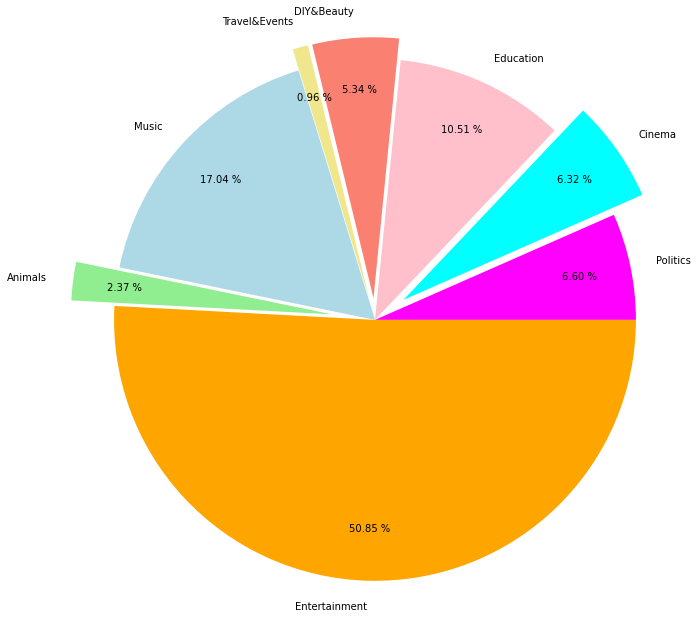

In [109]:
# Based on data that is found in categories.csv we can found out the distribution of videos by Categories

politics = usa.loc[(usa.category_id >= 100) & (usa.category_id <= 102)].count()[0]
cinema = usa.loc[(usa.category_id >= 200) & (usa.category_id <= 204)].count()[0]
education = usa.loc[(usa.category_id >= 300) & (usa.category_id <= 302)].count()[0]
diy_and_beauty = usa.loc[(usa.category_id >= 400) & (usa.category_id <= 497)].count()[0]
travel_and_events = usa.loc[(usa.category_id >= 500) & (usa.category_id <= 551)].count()[0]
music = usa.loc[(usa.category_id >= 600) & (usa.category_id <= 600)].count()[0]
animals = usa.loc[(usa.category_id >= 700) & (usa.category_id <= 700)].count()[0]
entertainment = usa.loc[(usa.category_id >= 800) & (usa.category_id <= 806)].count()[0]

categories = [politics, cinema, education, diy_and_beauty, travel_and_events, music, animals, entertainment]
explode = [0,.4,0,.25,.25,0,.5,0]
colors = ['magenta', 'cyan', 'pink', 'salmon', 'khaki', 'lightblue', 'lightgreen', 'orange']
labels = ['Politics', 'Cinema', 'Education', 'DIY&Beauty', 'Travel&Events', 'Music', 'Animals', 'Entertainment']

#plt.title('Distribution of videos by Categories!')

plt.pie(categories, labels=labels, radius=3, colors=colors, autopct='%.2f %%', pctdistance=0.8, explode=explode)
plt.show()

*In the Pie Chart above we see that when looking at USA dateset Entertainment category contains the largest number of trending videos among other categories (**50,85%** or ~ 20 000 videos), followed by Music category (**17,04%** or ~ 6 500 videos), followed by Education category (**10,51%** or 4 000 videos), and so on.*

## Views of the videos (USA)

#### A trending video with the fewest views (excluding those with 0 views)

In [116]:
usa[usa['views'] == usa['views'].min()].transpose()

,16285
video_id,y6KYFcta4SE
trending_date,18.26.01
title,"1 dead, others injured after Ky. school shooting"
channel_title,Newsy
publish_time,2018-01-23T15:30:01.000Z
views,549
likes,9
dislikes,0
comment_count,5
thumbnail_link,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg


*Video with the **LEAST** views is called "1 dead, others injured after Ky. school shooting" from channel "Newsy" which had accumulated **549** views.*

*TOP 5 trending videos with the **LEAST** Views - excluding those with 0 views*

In [244]:
unique_videos_usa_least_views = (usa[usa['views'] > 0].sort_values(by='views', ascending=True)).drop_duplicates(subset=['video_id']).head(5)
unique_videos_usa_least_views

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
16285,y6KYFcta4SE,18.26.01,"1 dead, others injured after Ky. school shooting",Newsy,2018-01-23 15:30:01,549,9,0,5,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...,US,",'shooting','kentucky','breaking news','u.s. n...",102.0
16499,dQMZLXaa1L8,18.27.01,Artwork Forge,Palo Alto Online,2018-01-10 23:53:56,658,1,0,0,https://i.ytimg.com/vi/dQMZLXaa1L8/default.jpg,False,False,False,Artwork Forge II - an art installation created...,US,",'[none]'",802.0
687,-JVITToppE0,17.16.11,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,2017-11-13 20:41:45,687,10,2,5,https://i.ytimg.com/vi/-JVITToppE0/default.jpg,False,False,False,Coach Taggart addresses the media ahead of the...,US,",'oregon','ducks','college athletics','college...",802.0
14504,zeQaJGkFyqQ,18.18.01,"Raw: 3 South Carolina Deputies, 1 Officer Shot",Associated Press,2018-01-16 12:16:44,748,9,0,0,https://i.ytimg.com/vi/zeQaJGkFyqQ/default.jpg,True,False,False,Three deputies and one police officer were sho...,NaN,NaN,NaN
179,qg0GdM60syI,17.14.11,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,2017-03-31 21:46:53,773,2,0,0,https://i.ytimg.com/vi/qg0GdM60syI/default.jpg,False,False,False,Anyone have one of those?,US,",'90s commercials','huffy'",302.0


#### A trending video with the maximum number of views

In [118]:
usa[usa['views'] == usa['views'].max()].transpose()

,44424
video_id,VYOjWnS4cMY
trending_date,18.02.06
title,Childish Gambino - This Is America (Official V...
channel_title,ChildishGambinoVEVO
publish_time,2018-05-06T04:00:07.000Z
views,2.25212e+08
likes,5.02345e+06
dislikes,343541
comment_count,517232
thumbnail_link,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg


*This view dont give us precise number of views for the most popular video, so we can found it with the code below.*

In [276]:
usa['views'].max()

225211923

*Video with the **MOST** views is called "Childish Gambino - This Is America (Official Video)" from channel "ChildsihGambinoVEVO" which had accumulated more than **225 million** views.

#### TOP 5 videos with the **MOST** Views

In [135]:
unique_videos_usa_most_views = usa.sort_values(by='views', ascending=False).drop_duplicates(subset=['video_id'])
unique_videos_usa_most_views[['title', 'views']].head(5)

,title,views
44424,Childish Gambino - This Is America (Official V...,225211923
7180,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127
40199,Ariana Grande - No Tears Left To Cry,148689896
40393,"Becky G, Natti Natasha - Sin Pijama (Official ...",139334502
44132,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920


## The most Likes, Comments, Dislikes and Views (USA)

*I will create a function 'visualize_most' that will take in a column name and it will visualize the videos that have the most counts of likes, comments, dislikes and views.*

In [193]:
def visualize_most(, column, num=10):
    sorted_df = usa.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:12] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

*Now we can call the 'visualize_most()' function while passing different column names*

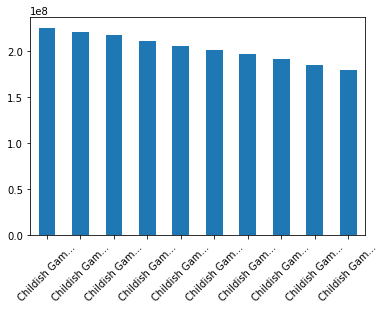

In [194]:
visualize_most(usa, 'views')

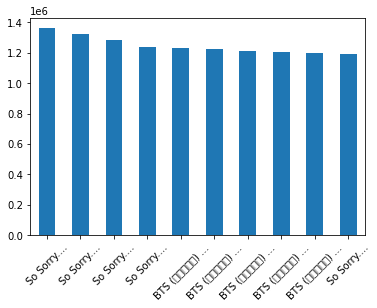

In [185]:
visualize_most(usa, 'comment_count')

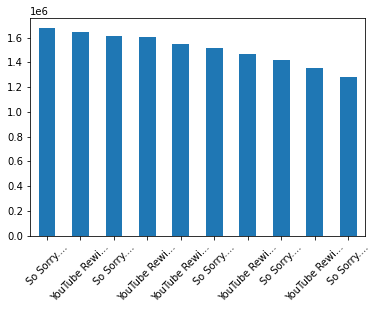

In [186]:
visualize_most(usa, 'dislikes')

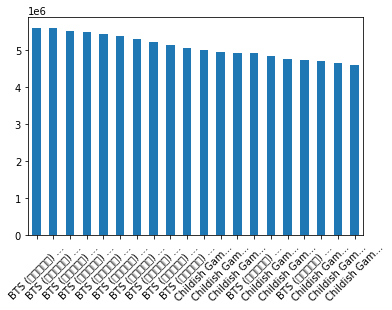

In [190]:
visualize_most(usa, 'likes', num=20)

## Most Popular Trending Channels (USA)

C:\Users\username\Downloads\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


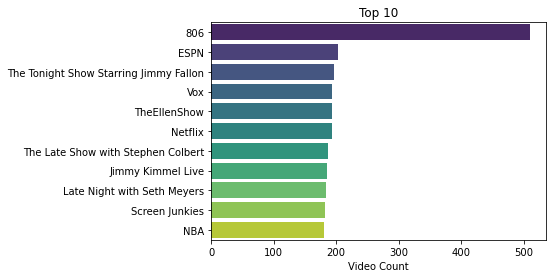

In [71]:
trending_channels = usa.groupby(['channel_title']).size().sort_values(ascending=False).head(11)
sns.barplot(trending_channels.values, trending_channels.index.values, palette = 'viridis')
plt.title('Top 10')
plt.xlabel('Video Count')
plt.show()
#in results I got some mysterious channel '806' that dont exist, so I ignore it

*We can conclude that in USA sport channels like ESPN, NBA and bunch of TV Shows are trending the most often.*

## Most Popular Publishing Day & Time (USA)

*Since we have a column of published time that contains day of the week, as well as hour in which video was published, we can split this column in 2 additional columns, where column will contain the name of the day and the 2nd column the number of hour.*

In [22]:
usa['day_published'] = usa['publish_time'].dt.day_name()
usa['hour_published'] = usa['publish_time'].dt.hour

*Now the dataset got 2 more columns **day_published** and **hour_published**.* And now we can vizualize it in Bar chart.

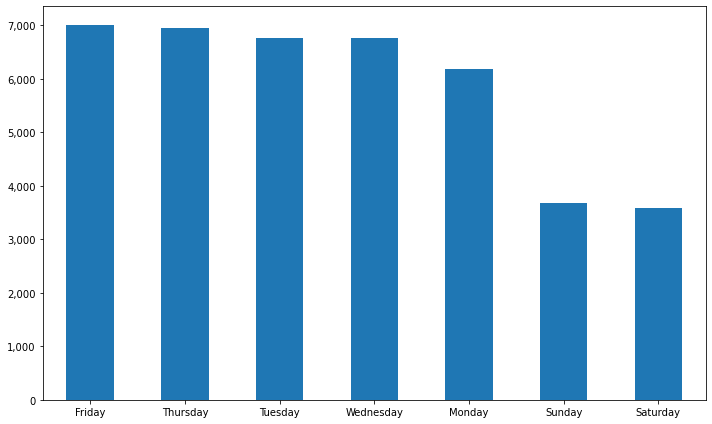

In [88]:
ax = usa['day_published'].value_counts().plot(
    kind='bar', figsize=(10,6), rot=0)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

*As seen in table above, the most trending videos was published in working days - **Thursday, Tuesday, Wednesday and Friday**, on Monday a slight decrease is observed. But on holidays there are a lot less people on internet, so there is no suprise that these are the days when a lot less videos became viral.*

#### Most Popular Publishing Hour

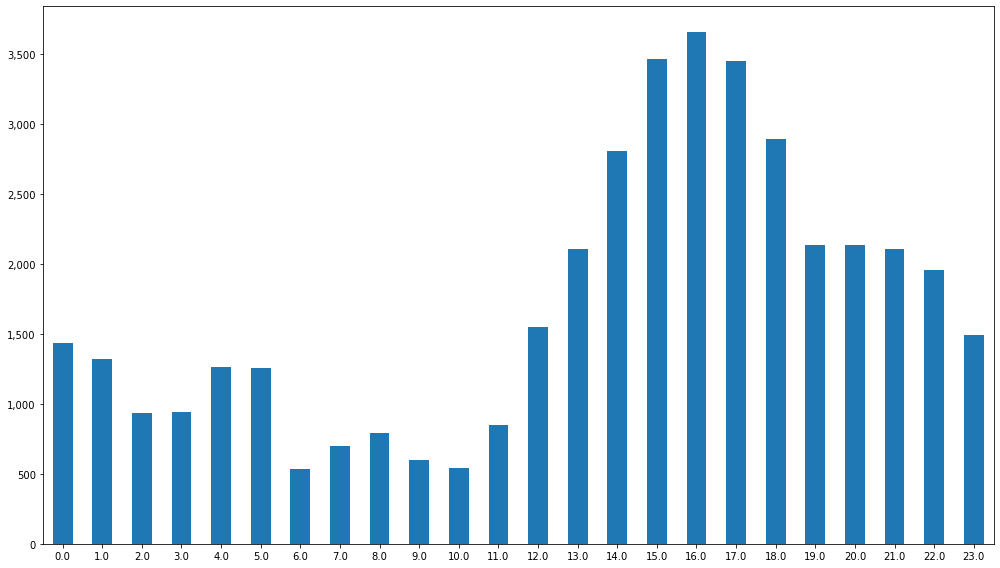

In [90]:
ax = usa['hour_published'].value_counts().sort_index().plot(
    kind='bar', figsize=(14,8), rot=0)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

*We can see that the most trending videos was published in the afternoon, gaining at **4 p.m.,** while the night-time is when you dont want to publish a video if you want it to go viral.*

### Correlations (USA)

In [53]:
columns_needed = ['views', 'likes', 'dislikes', 'comment_count'] # only these columns needed this time
corr_matrix = usa[columns_needed].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.851188,0.473872,0.620806
likes,0.851188,1.000000,0.449005,0.804414
dislikes,0.473872,0.449005,1.000000,0.700838
comment_count,0.620806,0.804414,0.700838,1.000000


*We can take one step further and take search for other correlations by inventing new variables (for example Like&Dislike Ratio, Percentage of Comments and Percentage of Reaction)*

In [50]:
usa['like_dislike_ratio'] = usa['likes'] / usa['dislikes']
usa['comments_percentage'] = usa['comment_count'] / usa['views']
usa['reaction_percentage'] = (usa['likes'] + usa['dislikes']) / usa['views']

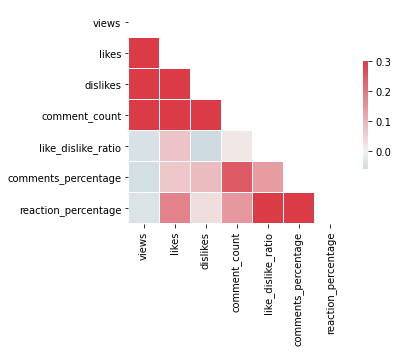

In [52]:
correlation = usa[['views', 'likes', 'dislikes', 'comment_count', 'like_dislike_ratio', 'comments_percentage', 'reaction_percentage']]
corr = correlation.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

*Matrix above shows that there are several moderate correlations. What I can see is that one of the most noticable is **comment count** is positevely related with views, likes and dislikes. That means that people who react with a like or dislike are also more likely leave a comment after watching the video.*

## Repeat all previous steps with Canada dataset

In [136]:
can = pd.read_csv('CAvideos.csv', sep=';')
can.head()

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,",'eminem','walk','on','water','aftermath/shady...",600.0
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,",'plush','bad unboxing','unboxing','fan mail',...",805.0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,",'racist superman','rudy','mancuso','king','ba...",805.0
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,",'ryan','higa','higatv','nigahiga','i dare you...",806.0
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,",'edsheeran','ed sheeran','acoustic','live','c...",600.0


In [137]:
can.head(1).transpose()

,0
video_id,n1WpP7iowLc
trending_date,17.14.11
title,Eminem - Walk On Water (Audio) ft. Beyoncé
channel_title,EminemVEVO
publish_time,2017-11-10T17:00:03.000Z
views,1.71586e+07
likes,787425
dislikes,43420
comment_count,125882
thumbnail_link,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg


In [138]:
can.shape

(42019, 17)

*Dataset consist of 42 019 rows and 17 columns.*

In [139]:
can.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'country', 'tags', 'category_id'],
      dtype='object')

*Unique videos in a dataset (Canada)*

In [140]:
count_of_unique_videos_can = can['video_id'].unique().shape[0]
count_of_unique_videos_can

23861

*Canada dateset contains 23 861 unique videos*

## Column Data types (CANADA)

In [141]:
can.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
publish_time               object
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
country                    object
tags                       object
category_id               float64
dtype: object

*Repeat same process that we did with previous dataset.*

In [ ]:
column_datatypes_to_change2 = ['views', 'likes', 'dislikes', 'comment_count']
for column in column_datatypes_to_change2:
    usa[column] = usa[column].astype(int)

In [142]:
can['trending_date'] = pd.to_datetime(can['trending_date'],errors='coerce', format='%y.%d.%m')
can['publish_time'] = pd.to_datetime(can['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [143]:
can.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
publish_time              datetime64[ns]
views                            float64
likes                            float64
dislikes                         float64
comment_count                    float64
thumbnail_link                    object
comments_disabled                 object
ratings_disabled                  object
video_error_or_removed            object
description                       object
country                           object
tags                              object
category_id                      float64
dtype: object

## Missing data (CANADA)

In [145]:
for i in can.columns:
    null_rate = can[i].isna().sum()/len(can)*100
    if null_rate >= 0:
        print("Column '{}' null rate: {}%".format(i,round(null_rate,2)))

Column 'video_id' null rate: 0.0%
Column 'trending_date' null rate: 5.68%
Column 'title' null rate: 4.7%
Column 'channel_title' null rate: 4.85%
Column 'publish_time' null rate: 5.68%
Column 'views' null rate: 5.68%
Column 'likes' null rate: 5.68%
Column 'dislikes' null rate: 5.68%
Column 'comment_count' null rate: 5.68%
Column 'thumbnail_link' null rate: 5.68%
Column 'comments_disabled' null rate: 5.68%
Column 'ratings_disabled' null rate: 5.68%
Column 'video_error_or_removed' null rate: 5.68%
Column 'description' null rate: 8.32%
Column 'country' null rate: 6.66%
Column 'tags' null rate: 6.66%
Column 'category_id' null rate: 8.84%


*Column 'category_id' has the most missing values - almost 9% is missing.*

In [147]:
can.isnull().sum()

video_id                     0
trending_date             2387
title                     1976
channel_title             2037
publish_time              2387
views                     2387
likes                     2387
dislikes                  2387
comment_count             2387
thumbnail_link            2387
comments_disabled         2387
ratings_disabled          2387
video_error_or_removed    2387
description               3494
country                   2798
tags                      2798
category_id               3715
dtype: int64

*We can see that all columns (except 'video_id') contains couple thousands of NULL values. There are no 1 right way to deal with them.*

*Since I want to do analysis on columns **Views**, **Likes,** **Dislikes** and **Comment_count**, we have to get rid of missing values in these columns. We could replace missing values with average values in each column, but this time I think we can replace NaN values with 0 as well.*

In [148]:
can['views'] = can['views'].fillna(0)
can['likes'] = can['likes'].fillna(0)
can['dislikes'] = can['dislikes'].fillna(0)
can['comment_count'] = can['comment_count'].fillna(0)

In [149]:
can.isnull().sum()

video_id                     0
trending_date             2387
title                     1976
channel_title             2037
publish_time              2387
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link            2387
comments_disabled         2387
ratings_disabled          2387
video_error_or_removed    2387
description               3494
country                   2798
tags                      2798
category_id               3715
dtype: int64

## Disabled Comments, Ratings & Errors (Canada)

In [150]:
can["video_error_or_removed"].value_counts()

False    39605
True        27
Name: video_error_or_removed, dtype: int64

*Out of videos that appeared on trending list (40 879) only **23** videos had errors or they were removed.*

In [151]:
can["comments_disabled"].value_counts()

False    39063
True       569
Name: comments_disabled, dtype: int64

*Only **569** videos had their comments disabled (as seen in code below).*

*We can see similar situation with videos that had their ratings disabled*

In [153]:
can["ratings_disabled"].value_counts()

False    39408
True       224
Name: ratings_disabled, dtype: int64

*Again, only a small portion (234) of all videos had their ratings disabled.*

## Top Categories (CANADA)

In [154]:
can['category_id'].value_counts().head(120)

806.0    12909
804.0     3832
102.0     3789
600.0     3718
805.0     3694
         ...  
463.0        1
424.0        1
515.0        1
527.0        1
433.0        1
Name: category_id, Length: 98, dtype: int64

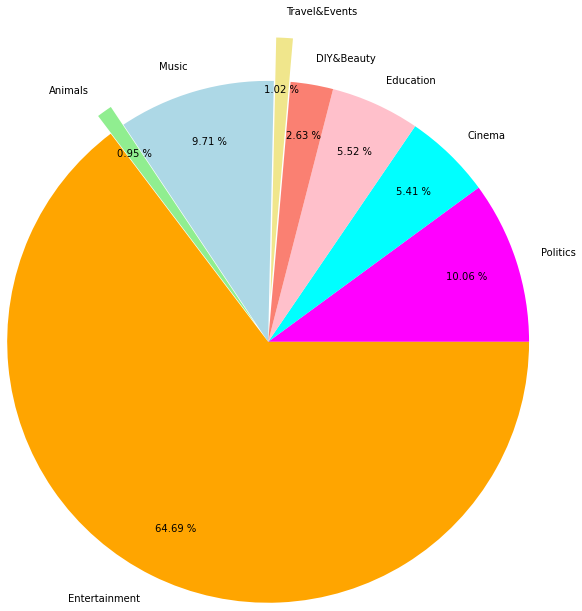

In [159]:
# Based on data that is found in categories.csv we can found out the distribution of videos by Categories

politics = can.loc[(can.category_id >= 100) & (can.category_id <= 102)].count()[0]
cinema = can.loc[(can.category_id >= 200) & (can.category_id <= 204)].count()[0]
education = can.loc[(can.category_id >= 300) & (can.category_id <= 302)].count()[0]
diy_and_beauty = can.loc[(can.category_id >= 400) & (can.category_id <= 497)].count()[0]
travel_and_events = can.loc[(can.category_id >= 500) & (can.category_id <= 551)].count()[0]
music = can.loc[(can.category_id >= 600) & (can.category_id <= 600)].count()[0]
animals = can.loc[(can.category_id >= 700) & (can.category_id <= 700)].count()[0]
entertainment = can.loc[(can.category_id >= 800) & (can.category_id <= 806)].count()[0]

categories = [politics, cinema, education, diy_and_beauty, travel_and_events, music, animals, entertainment]
explode = [0,0,0,0,.5,0,.25,0]
colors = ['magenta', 'cyan', 'pink', 'salmon', 'khaki', 'lightblue', 'lightgreen', 'orange']
labels = ['Politics', 'Cinema', 'Education', 'DIY&Beauty', 'Travel&Events', 'Music', 'Animals', 'Entertainment']

#plt.title('Distribution of videos by Categories!')

plt.pie(categories, labels=labels, radius=3, colors=colors, autopct='%.2f %%', pctdistance=0.8, explode=explode)
plt.show()

*In the Pie Chart above we see that when looking at CANADIAN dateset Entertainment category contains the largest number of trending videos among other categories **(64,69%),** followed by Politic category **(10,06%),** followed by Music category **(9,71%),** and so on.*

## Views of the videos (CANADA)

#### A trending video with the fewest views (excluding those with 0 views)

In [164]:
unique_videos_can_least_views = (can[can['views'] > 0].sort_values(by='views', ascending=True)).drop_duplicates(subset=['video_id']).head(1)
unique_videos_can_least_views

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
35699,bz91MAdY6FQ,2018-05-14,''Gala Artis 2018'' Le numéro d'ouverture,mart lat,2018-05-14 00:43:35,733.0,10.0,4.0,0.0,https://i.ytimg.com/vi/bz91MAdY6FQ/default.jpg,False,False,False,Anim.: Maripier Morin et Jean-Philippe Dion. L...,CA,",'gala','artis','2018','numéro d'ouverture','y...",806.0


*Video with the LEAST views is called **"Gala Artis 2018 Le numéro d'ouverture"** from channel "mart lat" which had accumulated 733 views.*

*TOP 5 trending videos with the LEAST Views - excluding those with 0 views*

In [165]:
unique_videos_can_least_views = (can[can['views'] > 0].sort_values(by='views', ascending=True)).drop_duplicates(subset=['video_id']).head(5)
unique_videos_can_least_views

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
35699,bz91MAdY6FQ,2018-05-14,''Gala Artis 2018'' Le numéro d'ouverture,mart lat,2018-05-14 00:43:35,733.0,10.0,4.0,0.0,https://i.ytimg.com/vi/bz91MAdY6FQ/default.jpg,False,False,False,Anim.: Maripier Morin et Jean-Philippe Dion. L...,CA,",'gala','artis','2018','numéro d'ouverture','y...",806.0
18577,_QPStIydtgg,2018-02-14,Canadian Olympian receives death threats from ...,The National,2018-02-14 03:45:33,1000.0,46.0,19.0,0.0,https://i.ytimg.com/vi/_QPStIydtgg/default.jpg,True,False,False,Canadian Olympian Kim Boutin received threats ...,CA,",'kim boutin','canadian olympian','bronze meda...",102.0
18607,CGv_PLrWArs,2018-02-14,Raptors Post-Game: DeMar DeRozan - February 13...,Toronto Raptors,2018-02-14 03:32:57,1023.0,65.0,5.0,23.0,https://i.ytimg.com/vi/CGv_PLrWArs/default.jpg,False,False,False,DeMar DeRozan addresses the media following To...,CA,",'nba','toronto','toronto raptors','raptors','...",802.0
21040,MTtFpn9C7Q4,2018-02-26,Simon Olivier Fecteau créateur des derniers By...,mart lat,2018-02-26 03:18:13,1107.0,14.0,1.0,3.0,https://i.ytimg.com/vi/MTtFpn9C7Q4/default.jpg,False,False,False,Simon Olivier Fecteau renoue avec son ingrat p...,CA,",'simon olivier fecteau','bye bye','en auditio...",806.0
581,0ayARJdf7I4,2017-11-16,018 Algebra Lineal 18-10-2011,udearroba,2017-11-15 18:20:06,1141.0,0.0,0.0,0.0,https://i.ytimg.com/vi/0ayARJdf7I4/default.jpg,False,False,False,Base ortogonal,CA,",'[none]'",302.0


### Video with the maximum number of views (CANADA)

In [166]:
can[can['views'] == can['views'].max()].transpose()

,6102
video_id,FlsCjmMhFmw
trending_date,2017-12-13 00:00:00
title,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
channel_title,YouTube Spotlight
publish_time,2017-12-06 17:58:51
views,1.37843e+08
likes,3.01448e+06
dislikes,1.60238e+06
comment_count,817582
thumbnail_link,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg


In [167]:
can['views'].max()

137843120.0

*Video with the **MOST** views is called **"YouTube Rewind: The Shape of 2017 | #YouTubeRe..."** from channel "YouTube Spotlight" which had accumulated more than 137 million views.*

*TOP 5 videos with the MOST Views*

In [168]:
unique_videos_can_most_views = can.sort_values(by='views', ascending=False).drop_duplicates(subset=['video_id'])
unique_videos_can_most_views[['title', 'views']].head(5)

,title,views
6102,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,137843120.0
35441,Childish Gambino - This Is America (Official V...,98938809.0
4905,Marvel Studios' Avengers: Infinity War Officia...,89930713.0
37577,BTS (방탄소년단) 'FAKE LOVE' Official MV,80738011.0
22635,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,61163906.0


In [245]:
without_dublicates_can = can.drop_duplicates(subset=['video_id'])

## The most Likes, Comments, Dislikes and Views (CANADA)

In [169]:
def visualize_most(can, column, num=10):
    sorted_df_can = can.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df_can[column].plot.bar(color=lightgreen)
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df_can['title']:
        labels.append(item[:12] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

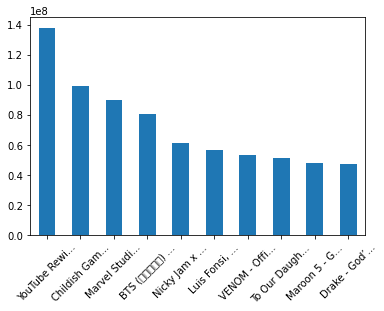

In [250]:
visualize_most(unique_videos_can_most_views, 'views')

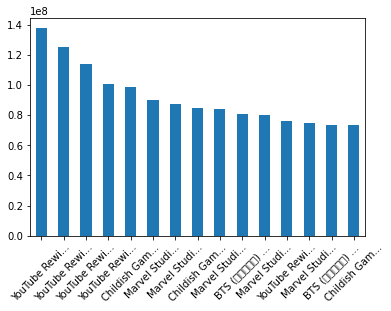

In [274]:
visualize_most(can, 'views', num=15)

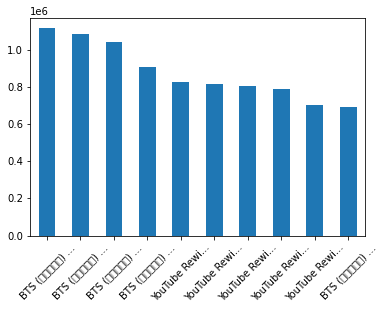

In [171]:
visualize_most(can, 'comment_count')

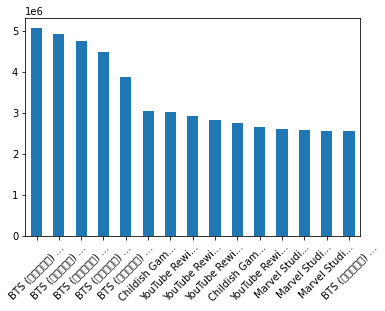

In [272]:
visualize_most(can, 'likes', num=15)

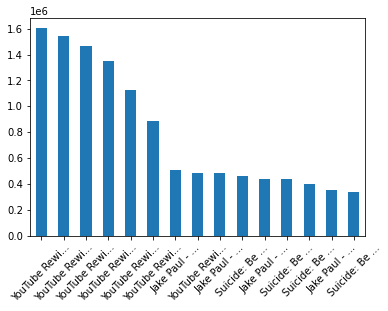

In [273]:
visualize_most(can, 'dislikes', num=15)

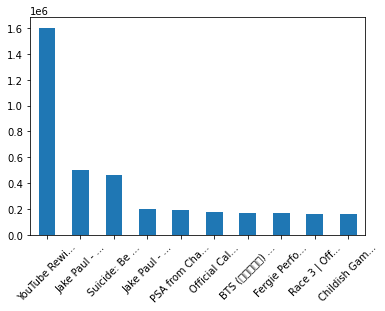

In [251]:
visualize_most(unique_videos_can_most_dislikes, 'dislikes')

In [248]:
unique_videos_can_most_dislikes = can.sort_values(by='dislikes', ascending=False).drop_duplicates(subset=['video_id'])
unique_videos_can_most_dislikes[['title', 'dislikes']].head(5)

,title,dislikes
6102,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,1602383.0
3079,Jake Paul - It's Everyday Bro (Remix) [feat. G...,504340.0
15278,Suicide: Be Here Tomorrow.,461660.0
299,Jake Paul - Saturday Night (Song) feat. Nick C...,200391.0
6903,PSA from Chairman of the FCC Ajit Pai,190227.0


## Most Popular Trending Channels (CANADA)

In [178]:
can.groupby(['channel_title']).size().sort_values(ascending=False).head(10)

channel_title
SET India                             192
MSNBC                                 189
FBE                                   188
The Young Turks                       186
REACT                                 183
VikatanTV                             182
CNN                                   182
The Late Show with Stephen Colbert    172
RadaanMedia                           168
ARY Digital                           168
dtype: int64

C:\Users\username\Downloads\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


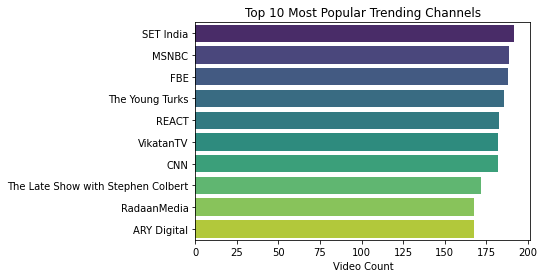

In [179]:
trending_channels_can = can.groupby(['channel_title']).size().sort_values(ascending=False).head(10)
sns.barplot(trending_channels_can.values, trending_channels_can.index.values, palette = 'viridis')
plt.title('Top 10 Most Popular Trending Channels')
plt.xlabel('Video Count')
plt.show()

*We can conclude that in Canada the most popular channels are news-based, like **SET India** that is entertainment pay television channel, followed by **MSNBC** (news-based TV channel) and so on. The only talk-show-based channel in TOP 10 list is **The Late Show with Stephen Colbert**.*

## Most Popular Publishing Day & Time (CANADA)

In [180]:
can['day_published'] = can['publish_time'].dt.day_name()
can['hour_published'] = can['publish_time'].dt.hour

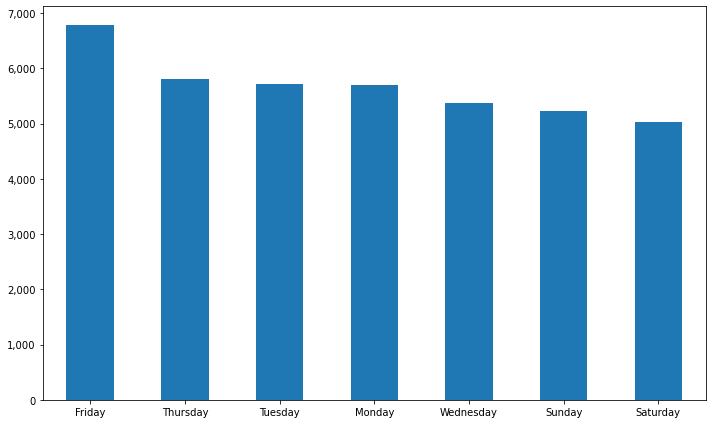

In [183]:
ax = can['day_published'].value_counts().plot(
    kind='bar', figsize=(10,6), rot=0)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

*As seen in table above, the most trending videos in Canada was published in working days - **Monday, Thursday, Tuesday, Wednesday and Friday**, the last one (Friday) had significant more trending videos than the rest of working days. But on holidays there were slighly less trending videos.*

### Most Popular Publishing Hour

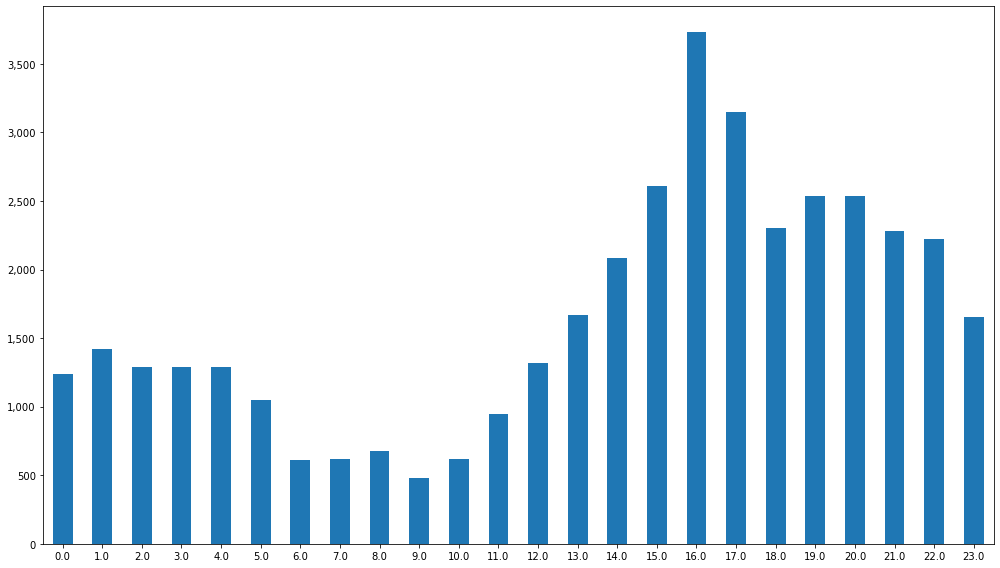

In [184]:
ax_can = can['hour_published'].value_counts().sort_index().plot(
    kind='bar', figsize=(14,8), rot=0)

ax_can.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

*We can see that the most trending videos in Canada was published in the afternoon, gaining rapid increase at **1:00 p.m** and reaching the maximum at **4 p.m.,** while early morning hours (6:00 a.m. - 10.00 a.m) is the time when you dont want to publish a video if you want it to go viral.*

### What words have been used to most as tags?

### Correlations (CANADA)

In [186]:
columns_needed_can = ['views', 'likes', 'dislikes', 'comment_count'] # only these columns needed this time
corr_matrix_can = can[columns_needed_can].corr()
corr_matrix_can

,views,likes,dislikes,comment_count
views,1.000000,0.829952,0.558564,0.694395
likes,0.829952,1.000000,0.460500,0.837043
dislikes,0.558564,0.460500,1.000000,0.643210
comment_count,0.694395,0.837043,0.643210,1.000000


## The table above shows that there are correlation between ...

In [188]:
can['like_dislike_ratio'] = can['likes'] / can['dislikes']
can['comments_percentage'] = can['comment_count'] / can['views']
can['reaction_percentage'] = (can['likes'] + can['dislikes']) / can['views']

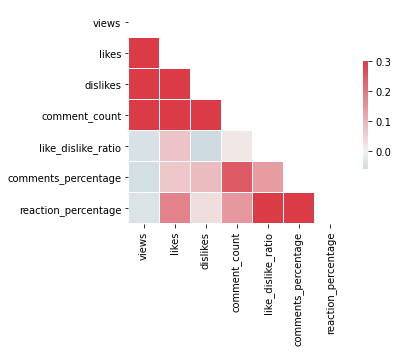

In [190]:
correlation_can = can[['views', 'likes', 'dislikes', 'comment_count', 'like_dislike_ratio', 'comments_percentage', 'reaction_percentage']]
corr_can = correlation.corr()

mask_can = np.zeros_like(corr_can, dtype=np.bool)
mask_can[np.triu_indices_from(mask_can)] = True

cmap_can = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_can, mask=mask_can, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

*Matrix above shows that there are several moderate correlations. Just like we saw previously in USA dataset, also in this Canada dataset most noticable correlation is comment count is positevely related with views, likes and dislikes. That means that people who react with a like or dislike are also more likely leave a comment after watching the video.*

## Repeat all previous steps with Great Britain dataset

In [191]:
gb = pd.read_csv('GBvideos.csv', sep=';')
gb.head()

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,2017-11-10T07:38:29.000Z,7224515.0,55681.0,10247.0,9479.0,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GB,",'christmas','john lewis christmas','john lewi...",NaN
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,2017-11-12T06:24:44.000Z,1053632.0,25561.0,2294.0,2757.0,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,GB,",'snl','saturday night live','snl season 43','...",806.0
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,17158579.0,787420.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,GB,",'eminem','walk','on','water','aftermath/shady...",600.0
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,2017-11-13T02:30:38.000Z,27833.0,193.0,12.0,37.0,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GB,",'salford city fc','salford city','salford','c...",802.0
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,2017-11-13T01:45:13.000Z,9815.0,30.0,2.0,30.0,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB,",'[none]'",102.0


### Shape of Great Britain Dataset

In [193]:
gb.shape

(42467, 17)

*GB Dataset consist of **42 467** rows and 17 columns.*

#### The names of all columns in this GB dataset

In [194]:
gb.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'country', 'tags', 'category_id'],
      dtype='object')

#### Unique videos in a dataset

In [195]:
count_of_unique_videos_gb = gb['video_id'].unique().shape[0]
count_of_unique_videos_gb

3417

*Great Britain dateset contains **3417** unique videos.*

## Column Data types (GB)

In [196]:
gb.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
publish_time               object
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
country                    object
tags                       object
category_id               float64
dtype: object

In [225]:
column_datatypes_to_change_gb = ['views', 'likes', 'dislikes', 'comment_count']
for column in column_datatypes_to_change_gb:
    gb[column] = gb[column].astype(int)

In [197]:
gb['trending_date'] = pd.to_datetime(gb['trending_date'],errors='coerce', format='%y.%d.%m')
gb['publish_time'] = pd.to_datetime(gb['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [226]:
gb.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
publish_time              datetime64[ns]
views                              int32
likes                              int32
dislikes                           int32
comment_count                      int32
thumbnail_link                    object
comments_disabled                 object
ratings_disabled                  object
video_error_or_removed            object
description                       object
country                           object
tags                              object
category_id                      float64
dtype: object

## Missing data (GB)

In [199]:
for i in gb.columns:
    null_rate_gb = gb[i].isna().sum()/len(gb)*100
    if null_rate >= 0:
        print("Column '{}' null rate: {}%".format(i,round(null_rate,2)))

Column 'video_id' null rate: 19.36%
Column 'trending_date' null rate: 19.36%
Column 'title' null rate: 19.36%
Column 'channel_title' null rate: 19.36%
Column 'publish_time' null rate: 19.36%
Column 'views' null rate: 19.36%
Column 'likes' null rate: 19.36%
Column 'dislikes' null rate: 19.36%
Column 'comment_count' null rate: 19.36%
Column 'thumbnail_link' null rate: 19.36%
Column 'comments_disabled' null rate: 19.36%
Column 'ratings_disabled' null rate: 19.36%
Column 'video_error_or_removed' null rate: 19.36%
Column 'description' null rate: 19.36%
Column 'country' null rate: 19.36%
Column 'tags' null rate: 19.36%
Column 'category_id' null rate: 19.36%


*All columns in GB Dataset has the same level of missing values - almost the **fifth part** is missing (19,36%).*

In [200]:
gb.isnull().sum()

video_id                     0
trending_date             3661
title                     2948
channel_title             3012
publish_time              3661
views                     3661
likes                     3661
dislikes                  3661
comment_count             3661
thumbnail_link            3661
comments_disabled         3661
ratings_disabled          3661
video_error_or_removed    3661
description               4273
country                   4374
tags                      4374
category_id               5202
dtype: int64

*We can see that all columns **(except 'video_id')** contains couple thousands of NULL values. There are no 1 right way to deal with them.*

*Get rid of missing values in columns **Views**, **Likes,** **Dislikes** and **Comment_count** to do analysis with them. We could replace missing values with average values in each column, but this time I think we can replace NaN values with 0 as well.*

In [201]:
gb['views'] = gb['views'].fillna(0)
gb['likes'] = gb['likes'].fillna(0)
gb['dislikes'] = gb['dislikes'].fillna(0)
gb['comment_count'] = gb['comment_count'].fillna(0)

In [202]:
gb.isnull().sum()

video_id                     0
trending_date             3661
title                     2948
channel_title             3012
publish_time              3661
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link            3661
comments_disabled         3661
ratings_disabled          3661
video_error_or_removed    3661
description               4273
country                   4374
tags                      4374
category_id               5202
dtype: int64

*Now neither of the mentioned columns has NULL values.*

### Disabled Comments, Ratings & Errors

In [203]:
gb["video_error_or_removed"].value_counts()

False    38737
True        69
Name: video_error_or_removed, dtype: int64

*Out of videos that had a information about this variable (38 806) only 69 videos had errors or they were removed.*

In [205]:
gb["comments_disabled"].value_counts()

False    38172
True       634
Name: comments_disabled, dtype: int64

*Only **634** videos had their comments disabled which is 1,5% of all videos that had info about this variable (as seen in code below).*

In [206]:
gb["ratings_disabled"].value_counts()

False    38596
True       210
Name: ratings_disabled, dtype: int64

*Once again, only a small portion **(210)** of all videos had their ratings disabled.*

## Top Categories (GB)

In [213]:
gb['category_id'].value_counts().head(120)

600.0    13715
806.0     8875
804.0     2864
201.0     1886
803.0     1788
805.0     1776
802.0     1670
102.0     1225
202.0      629
301.0      506
700.0      491
302.0      457
801.0      141
101.0       90
402.0       86
410.0       77
412.0       71
407.0       69
415.0       68
403.0       68
414.0       66
418.0       53
408.0       49
424.0       45
420.0       36
419.0       35
416.0       32
426.0       28
411.0       28
504.0       22
440.0       21
204.0       20
441.0       20
507.0       18
409.0       18
417.0       16
406.0       14
514.0       13
413.0       12
452.0       12
423.0       12
446.0       12
430.0       11
516.0       11
448.0       10
456.0       10
458.0       10
460.0       10
453.0        9
511.0        9
467.0        8
437.0        8
524.0        7
520.0        6
525.0        6
470.0        6
532.0        4
482.0        3
428.0        3
Name: category_id, dtype: int64

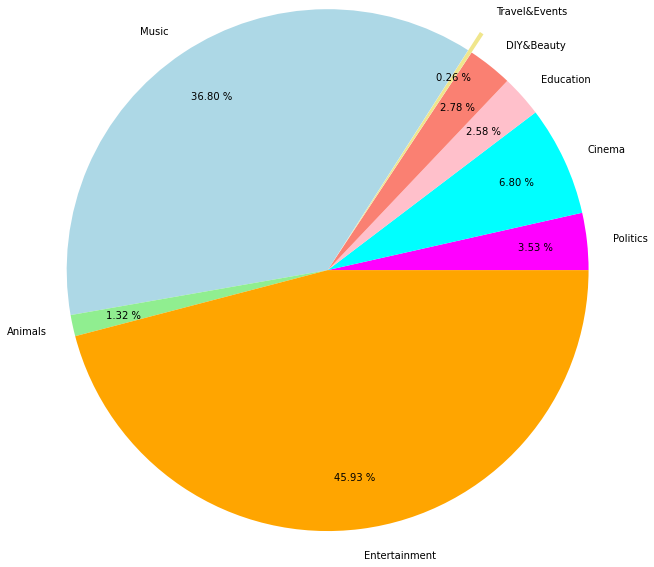

In [217]:
# Based on data that is found in categories.csv we can found out the distribution of videos by Categories

politics = gb.loc[(gb.category_id >= 100) & (gb.category_id <= 102)].count()[0]
cinema = gb.loc[(gb.category_id >= 200) & (gb.category_id <= 204)].count()[0]
education = gb.loc[(gb.category_id >= 300) & (gb.category_id <= 302)].count()[0]
diy_and_beauty = gb.loc[(gb.category_id >= 400) & (gb.category_id <= 497)].count()[0]
travel_and_events = gb.loc[(gb.category_id >= 500) & (gb.category_id <= 551)].count()[0]
music = gb.loc[(gb.category_id >= 600) & (gb.category_id <= 600)].count()[0]
animals = gb.loc[(gb.category_id >= 700) & (gb.category_id <= 700)].count()[0]
entertainment = gb.loc[(gb.category_id >= 800) & (gb.category_id <= 806)].count()[0]

categories = [politics, cinema, education, diy_and_beauty, travel_and_events, music, animals, entertainment]
explode = [0,0,0,0,.25,0,0,0]
colors = ['magenta', 'cyan', 'pink', 'salmon', 'khaki', 'lightblue', 'lightgreen', 'orange']
labels = ['Politics', 'Cinema', 'Education', 'DIY&Beauty', 'Travel&Events', 'Music', 'Animals', 'Entertainment']

#plt.title('Distribution of videos by Categories!')

plt.pie(categories, labels=labels, radius=3, colors=colors, autopct='%.2f %%', pctdistance=0.8, explode=explode)
plt.show()

*In the Pie Chart above we see that when looking at Great Britain dateset Entertainment category contains the largest number of trending videos among other categories **(45,93%)**, followed by Music category **(36,80%)**, followed by Cinema category **(6,80%)**, and so on.*

## Views of the videos (GB)

#### A trending video with the fewest views (excluding those with 0 views)

In [219]:
unique_videos_gb_least_views = (gb[gb['views'] > 0].sort_values(by='views', ascending=True)).drop_duplicates(subset=['video_id']).head(1)
unique_videos_gb_least_views

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
4111,n26wtR-OFr8,2017-12-01,Mountain Bikers Worried About Military Land Be...,That's Surrey TV,2017-11-27 18:08:49,851.0,12.0,0.0,3.0,https://i.ytimg.com/vi/n26wtR-OFr8/default.jpg,False,False,False,A group of mountain bikers are concerned that ...,GB,",'surrey','that's tv','that's surrey','mountai...",102.0


*Video with the LEAST views is called **"Mountain Bikers Worried About Military Land Be..."** from channel "That's Surrey TV" which had accumulated 851 views.*

##### TOP 5 trending videos with the LEAST Views - excluding those with 0 views

In [220]:
unique_videos_gb_least_views = (gb[gb['views'] > 0].sort_values(by='views', ascending=True)).drop_duplicates(subset=['video_id']).head(5)
unique_videos_gb_least_views

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,tags,category_id
4111,n26wtR-OFr8,2017-12-01,Mountain Bikers Worried About Military Land Be...,That's Surrey TV,2017-11-27 18:08:49,851.0,12.0,0.0,3.0,https://i.ytimg.com/vi/n26wtR-OFr8/default.jpg,False,False,False,A group of mountain bikers are concerned that ...,GB,",'surrey','that's tv','that's surrey','mountai...",102.0
5390,vPsic3dEndc,2017-12-07,QUIZ : Name the Trail : A Christmas Cracker,The 2Inch of Gnar,2017-12-01 11:34:30,1184.0,2.0,0.0,1.0,https://i.ytimg.com/vi/vPsic3dEndc/default.jpg,False,False,False,A Bad Brains Christmas Cracker! - #NameTheTrai...,GB,",'mtb','mountain biking','bike','bird','aeris'...",804.0
280,NcVxrr_q3Hw,2017-11-15,George Durack | Remembrance Sunday | You Can't...,Official Jeremy Corbyn Channel,2017-11-12 07:37:46,1505.0,88.0,12.0,40.0,https://i.ytimg.com/vi/NcVxrr_q3Hw/default.jpg,False,False,False,"Ahead of Remembrance Sunday, I visited my frie...",GB,",'[none]'",NaN
7522,BsQZPKeaKBg,2017-12-17,1080p WOLF OF THE AUTOSTRADA - RUF Automobile ...,VirusTornado,2017-12-13 20:08:02,1858.0,61.0,1.0,13.0,https://i.ytimg.com/vi/BsQZPKeaKBg/default.jpg,False,False,False,FULL HD VERSION\n\nFeaturing Valentino Balboni...,GB,",'ruf','porsche','ctr','yellowbird','911','car...",801.0
7947,B1tEq5RU-Wo,2017-12-19,Best bikes in the world: Cotic Soul,Guy Kesteven,2017-12-15 20:51:50,1930.0,54.0,0.0,24.0,https://i.ytimg.com/vi/B1tEq5RU-Wo/default.jpg,False,False,False,#sponsored Full live ride reviews of the lates...,GB,",'imovie','mountain bike','mountain biking','s...",802.0


#### A trending video with the maximum number of views

In [221]:
gb[gb['views'] == gb['views'].max()].transpose()

,30683
video_id,_I_D_8Z4sJE
trending_date,2018-04-07 00:00:00
title,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...
channel_title,NickyJamTV
publish_time,2018-03-02 05:00:19
views,4.24539e+08
likes,2.81877e+06
dislikes,149275
comment_count,99380
thumbnail_link,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg


In [222]:
gb['views'].max()

424538912.0

*In Great Britain video with the **MOST** views is called **"Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic..."** from channel "NickyJamTV" which had accumulated more than 424 million views.*

#### TOP 5 videos with the MOST Views

In [227]:
unique_videos_gb_most_views = gb.sort_values(by='views', ascending=False).drop_duplicates(subset=['video_id'])
unique_videos_gb_most_views[['title', 'views']].head(5)

,title,views
30683,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,424538912
37799,"Te Bote Remix - Casper, Nio García, Darell, Ni...",337621571
27677,Bad Bunny - Amorfoda | Video Oficial,328860380
23107,Ozuna x Romeo Santos - El Farsante Remix,288811992
41941,Childish Gambino - This Is America (Official V...,259721696


## The most Likes, Comments, Dislikes and Views (GB)

In [229]:
def visualize_most(gb, column, num=10):
    sorted_df_gb = gb.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df_gb[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df_gb['title']:
        labels.append(item[:12] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

*Before we pass into the function column names to found out the results, we can sort dataset and store it in a new variable without any dublicates.*

In [238]:
without_dublicates_gb = gb.drop_duplicates(subset=['video_id'])

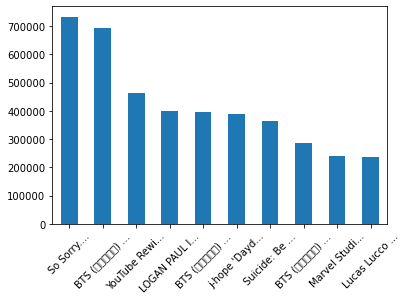

In [242]:
visualize_most(without_dublicates_gb, 'comment_count')

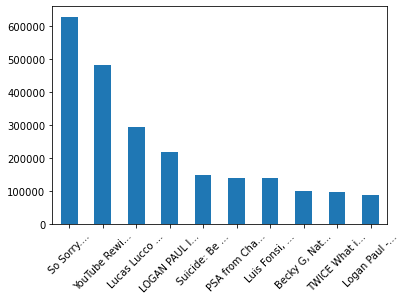

In [241]:
visualize_most(without_dublicates_gb, 'dislikes')

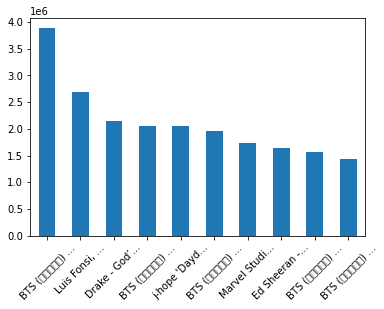

In [265]:
visualize_most(without_dublicates_gb, 'likes')

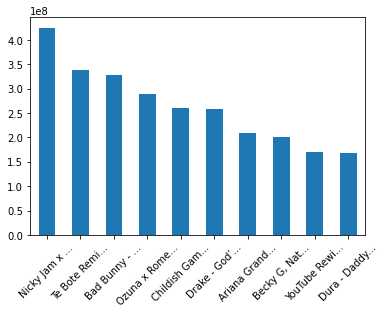

In [234]:
visualize_most(unique_videos_gb_most_views, 'views')

*In order to answer to 2nd question, we can include all videos from each region, even dublicates because each time the video appears in dataset represent the each time it became trendy.*

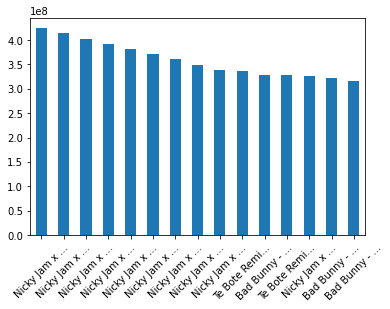

In [268]:
visualize_most(gb, 'views', num=15)

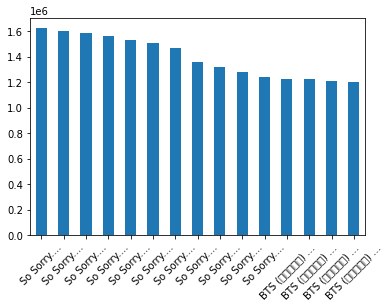

In [269]:
visualize_most(gb, 'comment_count', num=15)

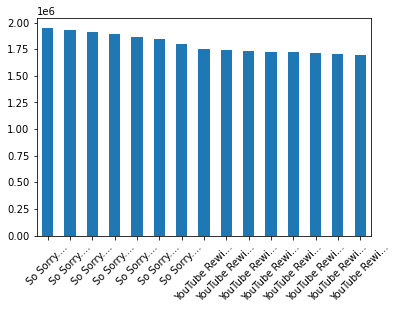

In [270]:
visualize_most(gb, 'dislikes', num=15)

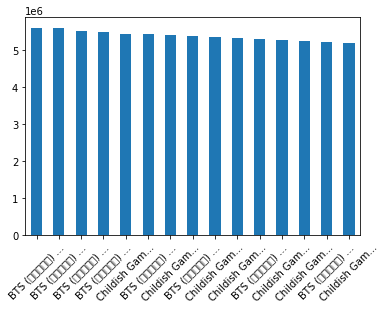

In [271]:
visualize_most(gb, 'likes', num=15)

## Most Popular Trending Channels (GB)

In [279]:
gb.groupby(['channel_title']).size().sort_values(ascending=False).head(12)

channel_title
806                                       249
802                                       237
The Tonight Show Starring Jimmy Fallon    208
Jimmy Kimmel Live                         207
TheEllenShow                              207
Saturday Night Live                       206
WWE                                       205
The Late Late Show with James Corden      202
Late Night with Seth Meyers               194
Breakfast Club Power 105.1 FM             193
The Late Show with Stephen Colbert        189
Netflix                                   187
dtype: int64

C:\Users\username\Downloads\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


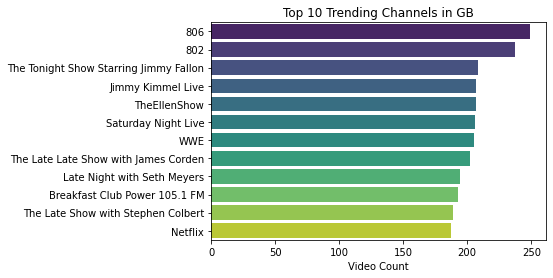

In [277]:
trending_channels_gb = gb.groupby(['channel_title']).size().sort_values(ascending=False).head(12)
sns.barplot(trending_channels_gb.values, trending_channels_gb.index.values, palette = 'viridis')
plt.title('Top 10 Trending Channels in GB')
plt.xlabel('Video Count')
plt.show()
#Again, in results I got some mysterious channel '806' and '802' that dont exist, so I ignore them.

*We can conclude that in Great Britain dominates **talk-show** channels like "The Tonight Show Starring Jimmy Fallon", "Jimmy Kimmel Live", "The EllenShow" and others. TOP 10 also entered by WWE that offers original shows and exclusives.*

### Most Popular Publishing Day & Time (GB)

In [280]:
gb['day_published'] = gb['publish_time'].dt.day_name()
gb['hour_published'] = gb['publish_time'].dt.hour

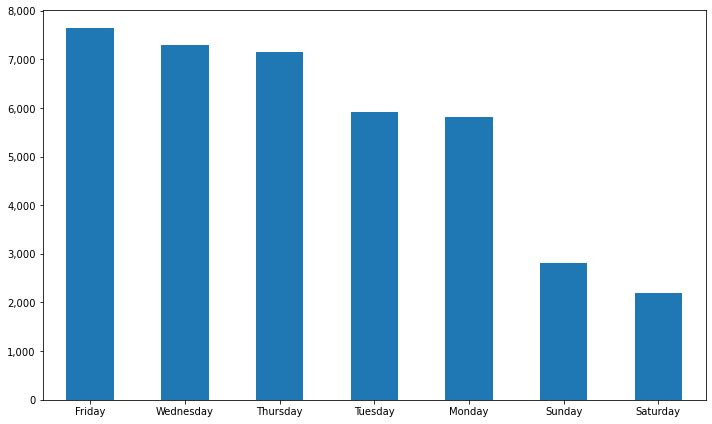

In [281]:
ax = gb['day_published'].value_counts().plot(
    kind='bar', figsize=(10,6), rot=0)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

*As seen in table above, the most trending videos in Great Britain was published in **working days** (just like in Canada and USA) - Monday, Thursday, Tuesday, Wednesday and Friday, with Friday having the highest number of trending videos than the rest of working days. But on holidays as it was expected there were significantly less publishing of trending videos.*

### Most Popular Publishing Hour (GB)

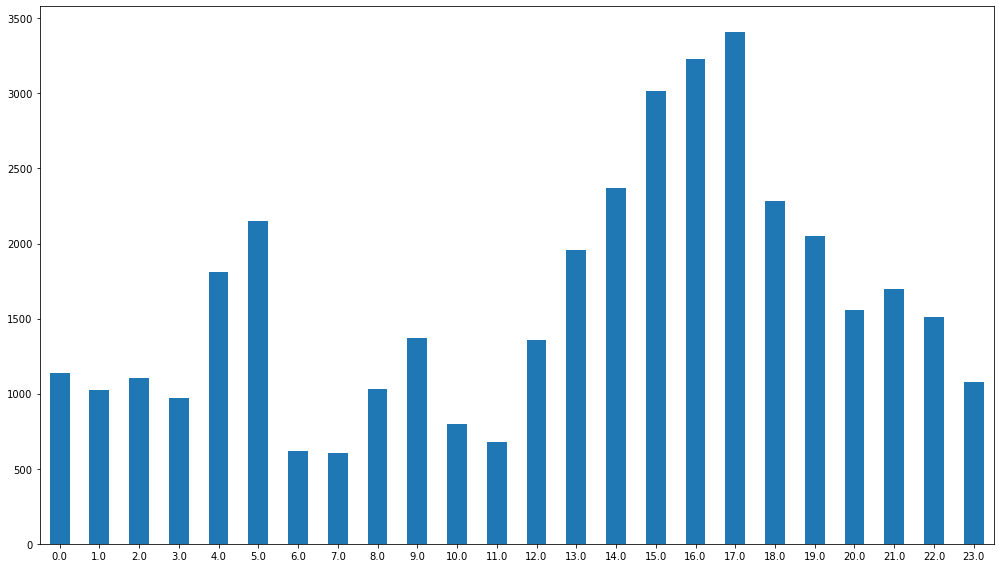

In [282]:
ax_gb = gb['hour_published'].value_counts().sort_index().plot(
    kind='bar', figsize=(14,8), rot=0)

ax_can.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()

*Here we can see very similar picture to what we saw previously in other regions. The most trending videos in Great Britain was published in the afternoon, gaining rapid increase at 1:00 p.m and reaching the maximum at 5 p.m., while early morning hours (6:00 a.m. - 8.00 a.m) is the time when you dont want to publish a video if you want it to go viral.*

### Correlations (GB)

In [283]:
columns_needed_gb = ['views', 'likes', 'dislikes', 'comment_count'] # only these columns needed this time
corr_matrix_gb = gb[columns_needed_can].corr()
corr_matrix_gb

,views,likes,dislikes,comment_count
views,1.000000,0.797739,0.394342,0.470436
likes,0.797739,1.000000,0.448368,0.745987
dislikes,0.394342,0.448368,1.000000,0.772125
comment_count,0.470436,0.745987,0.772125,1.000000


In [284]:
gb['like_dislike_ratio'] = gb['likes'] / gb['dislikes']
gb['comments_percentage'] = gb['comment_count'] / gb['views']
gb['reaction_percentage'] = (gb['likes'] + gb['dislikes']) / gb['views']

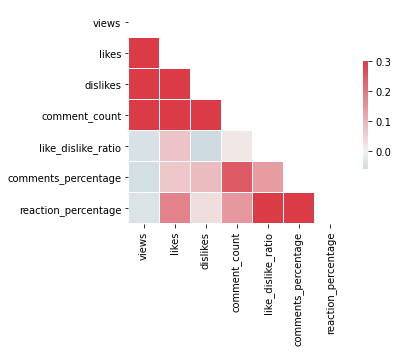

In [285]:
correlation_gb = gb[['views', 'likes', 'dislikes', 'comment_count', 'like_dislike_ratio', 'comments_percentage', 'reaction_percentage']]
corr_gb = correlation.corr()

mask_gb = np.zeros_like(corr_gb, dtype=np.bool)
mask_gb[np.triu_indices_from(mask_gb)] = True

cmap_gb = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_gb, mask=mask_gb, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

*Matrix above shows that there are several moderate correlations. Just like we saw previously in USA and Canada dataset, also in this Great Britain dataset most noticable correlation is comment count is positevely related with views, likes and dislikes. That means that people who react with a like or dislike are also more likely leave a comment after watching the video.*

## Analysis Results

### Insight Nr.1

*In all 3 regions I saw very similar picture in terms of the **time of the day** when the most trending videos were published. The most trending videos in these regions was published in the afternoon, gaining rapid increase at 1:00 p.m and reaching the maximum at 4 p.m., while early morning hours (6:00 a.m. - 9.00 a.m) is the time when you dont want to publish a video if you want it to go viral.*

### Insight Nr.2

*There were also similarities in days that were the most common for the trending videos to be published in. As it was expected, the most popular was working days with Friday being the most active, Monday - the least active, and that downward trend continued in holidays.* 

### Insight Nr.3

However, in USA, Canada and Great Britain there are differences in the popularity of channels. In Canada the most popular channels are **news-based-channels**, like SET India that is entertainment pay television channel, followed by MSNBC (news-based TV channel) and so on. The only **talk-show-based** channel in TOP 10 list is The Late Show with Stephen Colbert.

*In the **United States** the most popular was sport channels like "ESPN" and "NBA", as well as the same talk-shows and news site "Vox".*

*We can conclude that in Great Britain is more similar to United States, GB is dominated with **talk-show** channels like "The Tonight Show Starring Jimmy Fallon", "Jimmy Kimmel Live", "The EllenShow" and others. TOP 10 also entered by WWE that offers original shows and exclusives.*

### Business Team Question 1:

*Are there any clear differences between trending videos depending on the region?*

*Yes, there are clear differences between trending videos depending on the region. While in the USA the biggest category of trending videos is Entertainment (50,58%), followed by Music (17,04%) and Education (10,51%) in Great Britain it's quite different - Entertainment (45,93%) is on the same level as in USA, but the Music category **(36,80%)** is huge in Great Britain compaired to that in USA. At the same time category "Education" make up the smallest part **(2,58%)** compared to USA & Canada (**10,51% and 5,52%** respectively). It is also worth mentioning that **Politics** in Canada (10,06%) is almost 2 times bigger than in USA (6,60%) nad 3 times bigger than in GB (3,53%).*

* **USA -->** Entertainment (50,58%), Music (17,04%), Education (10,51%), Politics (6,60%), Cinema (6,32%), DIY&Beauty (5,34%), Animals (2,37%) and Travel&Events (0,96%)*

* **CANADA** --> Entertainment (64,69%), Music (9,71%), Education (5,52%), Politics (10,06%), Cinema (5,41%), DIY&Beauty (2,63%), Animals (0,95%) and Travel&Events (1,02%)*

* **GREAT BRITAIN** --> Entertainment (45,93%), Music (36,80%), Education (2,58%), Politics (3,53%), Cinema (6,80%), DIY&Beauty (2,78%), Animals (1,32%) and Travel&Events (0,26%)*

### Business Team Question 2:

*Which video remained the most on the trending videos list?*

*In USA region video that remained the most on the trending videos list (compaired them by how often they get into 'like', 'dislike', 'comment_count' and 'views' vizualizations) was **"Childish Gambino - This Is America (Official Video)"**. In Canada it was **"YouTube Rewind: The Shape of 2017 | #YouTubeRewind"**, but in Great Britain **"Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic.."**.* 

### Business Team Question 3:

*Which video category has the largest number of trending videos? Does the category give any advantage in order to become trending?*

*In all 3 regions the largest number of trending videos had video category **Entertainment.** This is a perfect proof that shows the category of video definitely gives advantage in order to become trending. Since most people use YouTube "to shorten the time" it is no suprise that the most common video category was Entertainment.*

### Business Team Question 4:

*How are views, likes and dislikes, title length, and other attributes correlated with (relate to) each other? Are they connected in any way?*

*Unfortunately, I do not have enough **time** to find a solution to this question, so if I had more time, I would dig deeper and get my head around the solution for this question. I played just a little bit with simple correlation functions, where I saw most noticable correlation - comment count is positevely related with views, likes and dislikes. That means that people who react with a like or dislike are also more likely leave a comment after watching the video.*

### Business Team Question 5:

*If Nordigen would upload a video, what words in the title (or description) or tags would you recommend to use? (In hopes to make the video trending)*

*The words I would recomment to use in hopes to make the video trending partly would depend on type of content Nordigen would publish. I would definitely not recommend to use the most popular keywords in the title, description or tags, because those are extremely busy keywords, hence it is only recomemended to use if you have a massive following, otherwise it's non effective way to make video trending. I would recommend to use keywords that are related to the company's niche (baltic banking, open-banking, etc.). I do have to mention that I would recommend to make content that is a mix of 2 different topics - Nordigen related information with a touch of entertainment.*

### Additional Questions that I am interested in (1):

*Which videos had the most views & comments in each region (USA, Canada, GB)?*

*In Great Britain video with the MOST views is called "Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic..." from channel "NickyJamTV" which had accumulated more than **424 million** views.*

*In Canada Video with the MOST views is called "YouTube Rewind: The Shape of 2017 | #YouTubeRe..." from channel "YouTube Spotlight" which had accumulated more than **137 million** views.*

*Video with the *MOST** views is called "Childish Gambino - This Is America (Official Video)" from channel "ChildsihGambinoVEVO" which had accumulated more than **225 million** views.*

### Additional Questions that I am interested in (2):

*How much of trending videos had their comments and ratings option turned off?*

*In all 3 regions the number of trending videos with turned off comment and rating option was extremly tiny - not even a 2%, which tells me that you better allow people to comment and rate your video if you want the best adds to get your video go viral.*

### The problems encountered

*Looks like I have data formatting issues or something along these lines because while performing analysis, there was a times when I saw unlogical results. For example, identifying the most popular channels - the results showed channels like "806" which are not legit channel. Those looks like a category codes that somehow has been picked up and shown in results.*

*If I had more time I would like to go into this problem and understand why it happened, which I am about to do soon, because, as we all know, going through confusion is the best way to strengthen knowledge.*

## The End!